In [1]:
import pandas as pd
import skimage
from PIL import Image
from PIL import ImageShow
import numpy as np
from matplotlib import pyplot as plt
import cv2
from numpy import linalg
import time
from sklearn import decomposition
import random
from sklearn.decomposition import PCA

In [2]:
import os
from PIL import Image
import pandas as pd

# define the directory path
dir_path = "GetImages_DF"

# create an empty dictionary to hold the dataframes
dfs = {}

# determine the size of the smallest image in all the folders
smallest_size = None
for folder in os.listdir(dir_path):
    # get the folder path
    folder_path = os.path.join(dir_path, folder)
    # check if the current item is a directory
    if os.path.isdir(folder_path):
        # loop through each file in the folder
        for file in os.listdir(folder_path):
            # get the file path
            file_path = os.path.join(folder_path, file)
            # check if the current item is a file and not a directory, and if it is a valid image file
            if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                # open the image using PIL
                try:
                    image = Image.open(file_path)
                    # determine the size of the smallest image
                    if smallest_size is None or min(image.size) < smallest_size:
                        smallest_size = min(image.size)
                except:
                    print("Error processing image:", file_path)

# loop through each folder in the directory
for folder in os.listdir(dir_path):
    # get the folder path
    folder_path = os.path.join(dir_path, folder)
    # check if the current item is a directory
    if os.path.isdir(folder_path):
        # create an empty list to hold the images
        images = []
        # loop through each file in the folder
        for file in os.listdir(folder_path):
            # get the file path
            file_path = os.path.join(folder_path, file)
            # check if the current item is a file and not a directory, and if it is a valid image file
            if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                # open the image using PIL
                try:
                    image = Image.open(file_path)
                    # resize the image to the size of the smallest image
                    new_size = (smallest_size, smallest_size)
                    image = image.resize(new_size)
                    # convert the image to a list of pixels
                    pixels = list(image.getdata())
                    # append the pixels to the images list
                    images.append(pixels)
                except:
                    print("Error processing image:", file_path)
        # create a dataframe from the list of images
        df = pd.DataFrame(images)
        # set the column names to be the pixel indices
        df.columns = ["pixel{}".format(i) for i in range(len(images[0]))]
        # add the dataframe to the dfs dictionary with the folder name as the key
        dfs[folder] = df


In [3]:
print(dfs.keys())
print(len(dfs["Fox_World"]))
print(len(dfs["BBC_Science"]))
print(len(dfs["Fox_US"]))
print(len(dfs["Fox_Health"]))

dict_keys(['Fox_World', 'BBC_Science', 'Fox_US', 'NYT_US', 'Fox_Health', 'BBC_US_Canada', 'Fox_Science', 'BBC_World', 'NYT_Health', 'NYT_World', 'NYT_Science', 'BBC_Health'])
99
100
59
100


15876
(59, 15876)
(15876, 3)


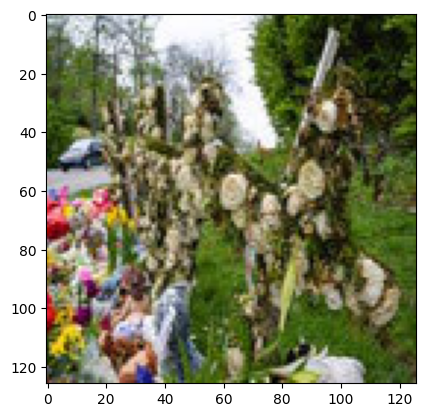

In [4]:
print(126*126)
print(dfs['NYT_US'].shape)

img = dfs['NYT_US'].loc[15]

rgb_values = [list(pixel) for pixel in img]

# create a numpy array from the RGB values
pixel_array = np.array(rgb_values, dtype=np.uint8)
print(pixel_array.shape)
# reshape the pixel array to the original image shape
pixel_array = pixel_array.reshape((126,126, 3))

# display the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(pixel_array)
plt.show()


In [47]:

Fox_World = []
for i in range(len(dfs['Fox_World'])):
    Fox_World_row = dfs['Fox_World'].iloc[i].apply(lambda x: np.array(x))
    Fox_World.append(Fox_World_row)
Fox_World = np.array(Fox_World)
FS = []
for i in range(len(Fox_World)):
    FS.append(np.array([a[:3] if len(a) == 4 else a for a in Fox_World[i]]))
Fox_World = np.array(FS)
print(Fox_World.shape)
Fox_World_no_y= Fox_World.copy()
#Fox World indicated by 1
Fox_World = Fox_World.reshape(99,47628)
Fox_World = pd.DataFrame(Fox_World)
Fox_World['Answer_Fox_World'] = "1"
Fox_World = np.array(Fox_World)

################################################################

BBC_World = []
for i in range(len(dfs['BBC_World'])):
    BBC_World_row = dfs['BBC_World'].iloc[i].apply(lambda x: np.array(x))
    #BBC_World_row = np.stack(BBC_World_row.to_numpy(), axis=0)
    BBC_World.append(BBC_World_row)
BBCS = []
for i in range(len(BBC_World)):
    BBCS.append(np.array([a[:3] if len(a) == 4 else a for a in BBC_World[i]]))

BBC_World = np.array(BBCS)
print(BBC_World.shape)
BBC_World_no_y= BBC_World.copy()

#BBC World indicated by 2
BBC_World = BBC_World.reshape(99,47628)

BBC_World = pd.DataFrame(BBC_World)
BBC_World['Answer_BBC'] = "2"
BBC_World = np.array(BBC_World)
   
################################################################


NYT_World = []
for i in range(len(dfs['NYT_World'])):
    NYT_World_row = dfs['NYT_World'].iloc[i].apply(lambda x: np.array(x))
    #NYT_World_row = np.stack(NYT_World_row.to_numpy(), axis=0)
    NYT_World.append(NYT_World_row)

NYTS = []
for i in range(len(NYT_World)):
    NYTS.append(np.array([a[:3] if len(a) == 4 else a for a in NYT_World[i]]))
NYT_World = np.array(NYTS)
print(NYT_World.shape)

NYT_World_no_y= NYT_World.copy()
#NYT_World indicated by 3
NYT_World = NYT_World.reshape(99,47628)
NYT_World = pd.DataFrame(NYT_World)
NYT_World['Answer_NYT_World'] = "3"
NYT_World = np.array(NYT_World)
################################################################
Fox_Science = []
for i in range(len(dfs['Fox_Science'])):
    Fox_Science_row = dfs['Fox_Science'].iloc[i].apply(lambda x: np.array(x))
    Fox_Science.append(Fox_Science_row)
Fox_Science = np.array(Fox_Science)
FS = []
for i in range(len(Fox_Science)):
    FS.append(np.array([a[:3] if len(a) == 4 else a for a in Fox_Science[i]]))
Fox_Science = np.array(FS)
print(Fox_Science.shape)
Fox_Science_no_y= Fox_Science.copy()
#Fox Science indicated by 11
Fox_Science = Fox_Science.reshape(100,47628)
Fox_Science = pd.DataFrame(Fox_Science)
Fox_Science['Answer_Fox_Science'] = "11"
Fox_Science = np.array(Fox_Science)

################################################################

BBC_Science = []
for i in range(len(dfs['BBC_Science'])):
    BBC_Science_row = dfs['BBC_Science'].iloc[i].apply(lambda x: np.array(x))
    #BBC_Science_row = np.stack(BBC_Science_row.to_numpy(), axis=0)
    BBC_Science.append(BBC_Science_row)
BBCS = []
for i in range(len(BBC_Science)):
    BBCS.append(np.array([a[:3] if len(a) == 4 else a for a in BBC_Science[i]]))

BBC_Science = np.array(BBCS)
print(BBC_Science.shape)
BBC_Science_no_y= BBC_Science.copy()

#BBC Science indicated by 22
BBC_Science = BBC_Science.reshape(100,47628)

BBC_Science = pd.DataFrame(BBC_Science)
BBC_Science['Answer_BBC_Science'] = "22"
BBC_Science = np.array(BBC_Science)
   
################################################################


NYT_Science = []
for i in range(len(dfs['NYT_Science'])):
    NYT_Science_row = dfs['NYT_Science'].iloc[i].apply(lambda x: np.array(x))
    #NYT_Science_row = np.stack(NYT_Science_row.to_numpy(), axis=0)
    NYT_Science.append(NYT_Science_row)

NYTS = []
for i in range(len(NYT_Science)):
    NYTS.append(np.array([a[:3] if len(a) == 4 else a for a in NYT_Science[i]]))
NYT_Science = np.array(NYTS)
print(NYT_Science.shape)

NYT_Science_no_y= NYT_Science.copy()
#NYT_Science indicated by 33
NYT_Science = NYT_Science.reshape(100,47628)
NYT_Science = pd.DataFrame(NYT_Science)
NYT_Science['Answer_NYT_Science'] = "33"
NYT_Science = np.array(NYT_Science)
################################################################
Fox_Health = []
for i in range(len(dfs['Fox_Health'])):
    Fox_Health_row = dfs['Fox_Health'].iloc[i].apply(lambda x: np.array(x))
    Fox_Health.append(Fox_Health_row)
Fox_Health = np.array(Fox_Health)
FS = []
for i in range(len(Fox_Health)):
    FS.append(np.array([a[:3] if len(a) == 4 else a for a in Fox_Health[i]]))
Fox_Health = np.array(FS)
print(Fox_Health.shape)
Fox_Health_no_y= Fox_Health.copy()
#Fox Health indicated by 111
Fox_Health = Fox_Health.reshape(100,47628)
Fox_Health = pd.DataFrame(Fox_Health)
Fox_Health['Answer_Fox_Health'] = "111"
Fox_Health = np.array(Fox_Health)

################################################################

BBC_Health = []
for i in range(len(dfs['BBC_Health'])):
    BBC_Health_row = dfs['BBC_Health'].iloc[i].apply(lambda x: np.array(x))
    #BBC_Health_row = np.stack(BBC_Health_row.to_numpy(), axis=0)
    BBC_Health.append(BBC_Health_row)
BBCS = []
for i in range(len(BBC_Health)):
    BBCS.append(np.array([a[:3] if len(a) == 4 else a for a in BBC_Health[i]]))

BBC_Health = np.array(BBCS)
print(BBC_Health.shape)
BBC_Health_no_y= BBC_Health.copy()

#BBC Health indicated by 222
BBC_Health = BBC_Health.reshape(100,47628)

BBC_Health = pd.DataFrame(BBC_Health)
BBC_Health['Answer_BBC_Health'] = "222"
BBC_Health = np.array(BBC_Health)
   
################################################################


NYT_Health = []
for i in range(len(dfs['NYT_Health'])):
    NYT_Health_row = dfs['NYT_Health'].iloc[i].apply(lambda x: np.array(x))
    #NYT_Health_row = np.stack(NYT_Health_row.to_numpy(), axis=0)
    NYT_Health.append(NYT_Health_row)

NYTS = []
for i in range(len(NYT_Health)):
    NYTS.append(np.array([a[:3] if len(a) == 4 else a for a in NYT_Health[i]]))
NYT_Health = np.array(NYTS)
print(NYT_Health.shape)

NYT_Health_no_y= NYT_Health.copy()
#NYT_Health indicated by 333
NYT_Health = NYT_Health.reshape(100,47628)
NYT_Health = pd.DataFrame(NYT_Health)
NYT_Health['Answer_NYT_Health'] = "333"
NYT_Health = np.array(NYT_Health)
################################################################
Fox_US = []
for i in range(len(dfs['Fox_US'])):
    Fox_US_row = dfs['Fox_US'].iloc[i].apply(lambda x: np.array(x))
    Fox_US.append(Fox_US_row)
Fox_US = np.array(Fox_US)
FS = []
for i in range(len(Fox_US)):
    FS.append(np.array([a[:3] if len(a) == 4 else a for a in Fox_US[i]]))
Fox_US = np.array(FS)
print(Fox_US.shape)
Fox_US_no_y= Fox_US.copy()
#Fox US indicated by 1111
Fox_US = Fox_US.reshape(59,47628)
Fox_US = pd.DataFrame(Fox_US)
Fox_US['Answer_Fox_US'] = "1111"
Fox_US = np.array(Fox_US)

################################################################

BBC_US = []
for i in range(len(dfs['BBC_US_Canada'])):
    BBC_US_row = dfs['BBC_US_Canada'].iloc[i].apply(lambda x: np.array(x))
    #BBC_US_row = np.stack(BBC_US_row.to_numpy(), axis=0)
    BBC_US.append(BBC_US_row)
BBCS = []
for i in range(len(BBC_US)):
    BBCS.append(np.array([a[:3] if len(a) == 4 else a for a in BBC_US[i]]))

BBC_US = np.array(BBCS)
print(BBC_US.shape)
BBC_US_no_y= BBC_US.copy()

#BBC US indicated by 2222
BBC_US = BBC_US.reshape(59,47628)

BBC_US = pd.DataFrame(BBC_US)
BBC_US['Answer_BBC_US'] = "2222"
BBC_US = np.array(BBC_US)
   
################################################################


NYT_US = []
for i in range(len(dfs['NYT_US'])):
    NYT_US_row = dfs['NYT_US'].iloc[i].apply(lambda x: np.array(x))
    #NYT_US_row = np.stack(NYT_US_row.to_numpy(), axis=0)
    NYT_US.append(NYT_US_row)

NYTS = []
for i in range(len(NYT_US)):
    NYTS.append(np.array([a[:3] if len(a) == 4 else a for a in NYT_US[i]]))
NYT_US = np.array(NYTS)
print(NYT_US.shape)

NYT_US_no_y= NYT_US.copy()
#NYT_US indicated by 3333
NYT_US = NYT_US.reshape(59,47628)
NYT_US = pd.DataFrame(NYT_US)
NYT_US['Answer_NYT_US'] = "3333"
NYT_US = np.array(NYT_US)

(99, 15876, 3)
(99, 15876, 3)
(99, 15876, 3)
(100, 15876, 3)
(100, 15876, 3)
(100, 15876, 3)
(100, 15876, 3)
(100, 15876, 3)
(100, 15876, 3)
(59, 15876, 3)
(59, 15876, 3)
(59, 15876, 3)


In [48]:
All_Fox = np.concatenate((Fox_US, Fox_Health, Fox_Science, Fox_World), axis=0)
All_BBC = np.concatenate((BBC_US, BBC_Health, BBC_Science, BBC_World), axis=0)
All_NYT = np.concatenate((NYT_US, NYT_Health, NYT_Science, NYT_World), axis=0)

In [49]:
All_Pubs = np.concatenate((Fox_US, Fox_Health, Fox_Science, Fox_World,BBC_US, BBC_Health, BBC_Science, BBC_World,NYT_US, NYT_Health, NYT_Science, NYT_World), axis=0)

In [ ]:
#### Now Doing Between ALL PUBS #####

In [50]:
num_rows = All_Pubs.shape[0]
shuffled_indices = np.random.permutation(num_rows)

# shuffle the rows based on the shuffled indices
All_Pubs = All_Pubs[shuffled_indices, :]

All_Pubs=pd.DataFrame(All_Pubs)
All_Pubs_x = All_Pubs.iloc[:,:-1]
All_Pubs_y = All_Pubs[47628]
All_Pubs_x = np.array(All_Pubs_x)
All_Pubs_y = np.array(All_Pubs_y)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test= train_test_split(All_Pubs_x, All_Pubs_y, test_size=0.2, random_state=2, shuffle = False)

#getting just a publication number instead of coding for each subsection (needed for intra-publication comparison of sections)
new_y_test = []
for i in y_test:
    new_y_test.append(i[0])

new_y_train = []
for i in y_train:
    new_y_train.append(i[0])


y_train = np.array(new_y_train).astype(int)
y_test = np.array(new_y_test).astype(int)

print(y_train)
print(y_test)

[2 3 2 3 1 1 1 2 3 1 3 1 3 2 1 3 2 3 2 1 2 3 1 2 1 2 1 2 3 2 1 1 3 2 1 1 3
 3 2 2 3 3 3 1 1 2 3 1 2 2 2 1 1 3 1 1 2 2 1 3 1 1 2 2 1 2 1 3 1 1 2 1 3 3
 3 3 2 3 2 1 1 2 3 3 3 2 1 1 3 3 2 2 3 3 3 1 3 3 1 2 1 2 3 1 2 2 1 1 3 1 2
 1 3 1 2 3 3 3 3 1 2 2 1 1 3 2 3 3 1 1 3 1 1 2 1 3 1 2 1 1 1 3 2 1 2 2 3 3
 1 1 3 1 2 1 2 2 2 1 2 2 2 3 2 1 1 2 1 1 1 3 2 3 3 1 3 2 3 3 3 1 2 3 1 3 2
 2 2 2 2 1 2 3 2 1 3 1 1 2 2 2 3 3 2 3 2 1 2 2 3 1 3 1 1 2 3 1 2 3 1 3 2 1
 2 1 1 1 2 3 2 2 2 1 3 1 1 2 1 1 1 2 2 3 2 1 1 3 1 3 2 2 1 1 2 1 2 1 3 2 1
 2 1 3 1 2 2 2 1 3 3 1 3 2 3 3 2 3 2 2 2 1 3 3 1 3 1 1 1 3 3 3 1 3 1 2 3 1
 1 3 3 2 1 3 1 1 2 1 2 1 2 2 2 3 2 3 3 2 1 1 2 1 3 1 3 2 3 2 3 3 2 1 3 1 1
 2 2 3 3 1 2 2 2 3 3 3 2 3 1 3 3 3 2 2 1 2 1 1 2 1 1 1 3 2 1 2 2 1 3 2 2 2
 1 1 2 1 1 2 3 3 2 2 2 2 3 1 2 3 3 1 2 1 3 2 2 2 1 1 2 2 1 3 3 1 3 1 2 1 1
 2 2 2 1 1 2 2 3 3 1 1 2 2 1 3 1 1 2 3 1 1 1 3 2 3 3 2 1 3 1 2 2 2 1 1 1 3
 1 2 3 3 3 2 1 1 3 1 2 3 1 1 1 3 1 3 3 1 2 3 1 1 3 1 3 3 1 2 2 1 2 2 1 3 1
 1 2 3 1 3 2 3 1 2 2 3 2 

In [65]:
# X_train = X_train.reshape(80, 47628)
# X_test = X_test.reshape(20,15876, 3)

# a = X_train[0].reshape(126,126,3)
# plt.imshow(a)
# plt.show()

#Creating Clusters
k = 3
clusters = KMeans(k, random_state = 60)
clusters.fit(X_train, y_train)
prediction_test = clusters.predict(X_test)

/Users/antheamariemitchell/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
print(prediction_test)
print(y_test)

[1 0 1 0 0 0 0 0 2 0 2 0 2 1 1 2 0 1 0 1 0 0 1 2 0 0 1 1 2 1 0 0 2 0 2 1 0
 2 0 0 0 0 0 0 0 1 0 1 0 2 1 1 1 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 0 0
 0 0 2 1 1 1 0 0 0 0 0 2 0 0 0 2 0 0 1 0 1 1 0 0 1 0 0 1 0 2 0 0 1 1 1 2 2
 1 2 0 0 0 2 0 0 0 0 1 0 0 0 0 2 0 2 1 0 2 0 0 0 0 2 1 1 0 0 0 0 2 0 1 0 2
 0 1 0 2 1 2 2 2 1 1 1 2 2 0 1 0 0 0 0 0 2 0 1 0 1 0 0 0 2 0 1 0 2 0 2 2 0
 0 0 0 2 0 0 0 2 0 1 2 2 0 0 1 0 0 2 2 1 0 1 0 0 1 1 1 1 2 2]
[1 3 2 2 3 1 1 2 1 2 3 2 3 2 1 3 2 1 2 1 3 3 1 3 3 2 2 1 3 1 3 1 1 2 3 1 2
 2 3 1 3 2 1 3 2 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 1 3 3 3 1 3 3 3 2 1 3 2 3
 3 3 2 3 1 1 1 3 2 3 1 2 3 2 1 1 2 2 2 1 2 3 3 3 3 2 1 1 2 1 2 1 2 2 2 3 3
 2 3 2 3 3 2 1 2 1 1 2 1 1 1 3 1 3 1 2 3 3 1 3 2 2 3 1 3 2 2 3 3 2 2 2 3 2
 2 1 3 2 3 1 1 1 1 1 1 1 2 2 1 3 1 1 1 3 2 2 3 3 1 2 1 2 2 2 2 2 3 2 3 3 2
 3 3 2 3 3 1 1 3 1 3 3 3 2 3 1 2 3 3 3 1 3 3 3 2 2 3 3 1 1 1]


In [67]:
cluster_ind1 = []
cluster_ind2 = []
cluster_ind3 = []
for index, value in enumerate(prediction_test):
    if value == 0:
        cluster_ind1.append(index) 
    elif value == 1:
        cluster_ind2.append(index)
    elif value == 2:
        cluster_ind3.append(index)
    
print(cluster_ind1)
print(cluster_ind2)
print(cluster_ind3)

[1, 3, 4, 5, 6, 7, 9, 11, 16, 18, 20, 21, 24, 25, 30, 31, 33, 36, 38, 39, 40, 41, 42, 43, 44, 46, 48, 53, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 93, 96, 97, 99, 100, 102, 104, 105, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 127, 130, 132, 133, 134, 135, 139, 140, 141, 142, 144, 146, 148, 150, 161, 163, 164, 165, 166, 167, 169, 171, 173, 174, 175, 177, 179, 181, 184, 185, 186, 187, 189, 190, 191, 193, 197, 198, 200, 201, 205, 207, 208]
[0, 2, 13, 14, 17, 19, 22, 26, 27, 29, 35, 45, 47, 50, 51, 52, 71, 77, 78, 79, 92, 94, 95, 98, 101, 106, 107, 108, 111, 121, 129, 137, 138, 145, 149, 152, 156, 157, 158, 162, 170, 172, 178, 194, 199, 204, 206, 209, 210, 211, 212]
[8, 10, 12, 15, 23, 28, 32, 34, 37, 49, 54, 56, 66, 68, 69, 76, 85, 89, 103, 109, 110, 112, 116, 126, 128, 131, 136, 143, 147, 151, 153, 154, 155, 159, 160, 168, 176, 180, 182, 183, 188, 192, 195, 196, 202, 203, 213, 214]


In [141]:
Fox_count = 0
BBC_count = 0
NYT_count = 0
# for i in cluster_ind1:
    #img = X_test[i].reshape((126,126,3)).astype(int)
    #plt.imshow(img)
    #plt.axis('off')
    #plt.show()  
    #print(y_test[i])
    # if y_test[i] == 1:
    #     Fox_count = Fox_count+1
    # elif y_test[i] == 2:
    #     BBC_count = BBC_count+1
    # elif y_test[i] == 3:
    #     NYT_count = NYT_count+1


for i in cluster_ind2:
#     img = X_test[i].reshape((126,126,3)).astype(int)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()  
#     print(y_test[i])
    # if y_test[i] == 1:
    #     Fox_count = Fox_count+1
    # elif y_test[i] == 2:
    #     BBC_count = BBC_count+1
    # elif y_test[i] == 3:
    #     NYT_count = NYT_count+1


# for i in cluster_ind3:
#     img = X_test[i].reshape((126,126,3)).astype(int)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()  
#     print(y_test[i])
    if y_test[i] == 1:
            Fox_count = Fox_count+1
    elif y_test[i] == 2:
        BBC_count = BBC_count+1
    elif y_test[i] == 3:
        NYT_count = NYT_count+1


#Fox US indicated by 1
#BBC US indicated by 2
#NYT_US indicated by 3


print(Fox_count)
print(BBC_count)
print(NYT_count)


21
15
15


In [68]:
'''The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently 
of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). 
The adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

'''
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_test, prediction_test)



0.007544966504863189

In [117]:
fox_for_pca = []
bbc_for_pca = []
nyt_for_pca = []
for index, value in enumerate(y_train):
    if value == 1:
        fox_for_pca.append(index) 
    elif value == 2:
        bbc_for_pca.append(index)
    elif value == 3:
        nyt_for_pca.append(index)

X_train_fox_PCA = []
X_train_bbc_PCA = []
X_train_nyt_PCA = []

for index, value in enumerate(X_train):
    if index in fox_for_pca:
        X_train_fox_PCA.append(value) 
    elif index in bbc_for_pca:
        X_train_bbc_PCA.append(value)  
    elif index in nyt_for_pca:
        X_train_nyt_PCA.append(value)
X_train_fox_PCA = np.array(X_train_fox_PCA)
X_train_bbc_PCA = np.array(X_train_bbc_PCA)
X_train_nyt_PCA = np.array(X_train_nyt_PCA)
print(X_train_fox_PCA.shape)
print(X_train_bbc_PCA.shape)
print(X_train_nyt_PCA.shape)


(294, 47628)
(290, 47628)
(275, 47628)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


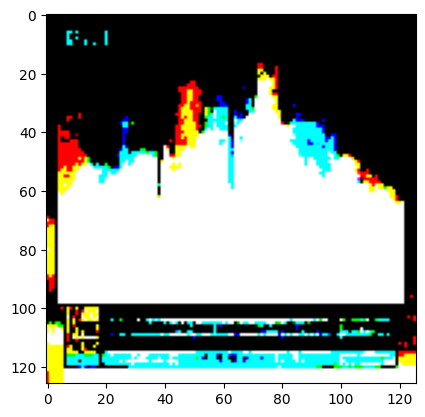

In [129]:
#X_train, X_test, y_train, y_test
#PCA Fox
X_train_fox_PCA = X_train_fox_PCA.reshape(294,47628)
pca_reg = decomposition.PCA(5)
pca_reg.fit(X_train_fox_PCA.T)
PCA_fox_US = pca_reg.transform(X_train_fox_PCA.T)
# print(PCA_Fox_US.shape)
a = PCA_fox_US.T[0].reshape(126, 126, 3)
# display the image using matplotlib
plt.imshow(a)
# plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


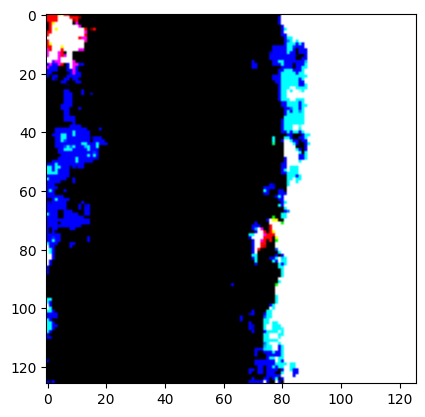

In [114]:
#PCA Fox
X_train_bbc_PCA = X_train_bbc_PCA.reshape(290,47628)
pca_reg = decomposition.PCA(25)
pca_reg.fit(X_train_bbc_PCA.T)
PCA_bbc_US = pca_reg.transform(X_train_bbc_PCA.T)

# print(PCA_Fox_US.shape)
b = PCA_bbc_US.T[2].reshape(126, 126, 3)
# display the image using matplotlib
plt.imshow(b)
# plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


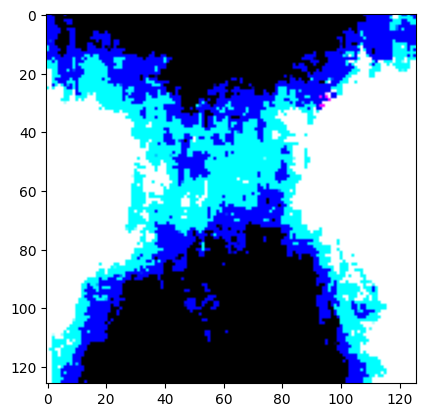

In [113]:
#PCA Fox
X_train_nyt_PCA = X_train_nyt_PCA.reshape(275,47628)
pca_reg = decomposition.PCA(25)
pca_reg.fit(X_train_nyt_PCA.T)
PCA_nyt_US = pca_reg.transform(X_train_nyt_PCA.T)

# print(PCA_Fox_US.shape)
c = PCA_nyt_US.T[3].reshape(126, 126, 3)
# display the image using matplotlib
plt.imshow(c)
# plt.axis('off')
plt.show()

In [107]:
yfox = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
ybbc = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
ynyt = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
yfox = np.array(yfox)
ybbc = np.array(ybbc)
ynyt = np.array(ynyt)
PCA_fox_US
PCA_bbc_US
PCA_nyt_US

All_US_PCA_x = np.concatenate((PCA_fox_US.T, PCA_bbc_US.T, PCA_nyt_US.T), axis=0)
All_US_PCA_y = np.concatenate((yfox,ybbc,ynyt),axis=0)


print(All_US_PCA_y.shape)
print(All_US_PCA_x.shape)
print(X_test.shape)
print(y_test.shape)

(75,)
(55, 47628)
(215, 47628)
(215,)


In [127]:
k = 3
clusters_pca = KMeans(k, random_state = 60)
clusters_pca.fit(All_US_PCA_x, All_US_PCA_y)
prediction_test_pca = clusters_pca.predict(X_test)

/Users/antheamariemitchell/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [128]:
print(prediction_test_pca)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [130]:
'''The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently 
of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). 
The adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

'''
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_test, prediction_test_pca)



0.0